# 4.4.3 局所的収束率の検証

In [1]:
import numpy as np

### コード4.6: 拡張Rosenbrock 関数

In [2]:
def func_Ex_rosen(x): # 拡張ローゼンブロック関数の目的関数
    return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (x[:-1] - 1)**2)
def grad_Ex_rosen(x): # 拡張ローゼンブロック関数勾配
    n = len(x)
    grad = np.zeros(n)
    grad[0] = -400 * x[0] * (x[1] - x[0]**2) + 2 * (x[0] - 1)
    for i in range(1, n-1):
        grad[i] = 200 * (x[i] - x[i-1]**2) - 400 * x[i] * (x[i+1] - x[i]**2) + 2 * (x[i] - 1)
    grad[n-1] = 200 * (x[n-1] - x[n-2]**2)
    return grad
def hess_Ex_rosen(x): # 拡張ローゼンブロック関数のヘッセ行列
    n = len(x)
    H = np.zeros((n, n))
    # 対角要素
    H[0, 0] = 1200 * x[0]**2 - 400 * x[1] + 2
    for i in range(1, n-1):
        H[i, i] = 202 + 1200 * x[i]**2 - 400 * x[i+1]
    H[n-1, n-1] = 200
    # 非対角要素
    for i in range(n-1):
        H[i, i+1] = -400 * x[i]
        H[i+1, i] = -400 * x[i]
    return H

### コード4.7: 局所的収束性の検証

In [5]:
from code3_1v2 import * # 最急降下法（点列のログを残すバージョン）のコードを読み込み
from code3_2v2 import * # 非線形共役勾配法（点列のログを残すバージョン）のコードを読み込み
from code4_1v2 import * # ニュートン法（点列のログを残すバージョン）のコードを読み込み
from code4_3v2 import * # 準ニュートン法（点列のログを残すバージョン）のコードを読み込み

SD, iter: 5000 f(x): 0.0006752204540020584
CG(HS), iter: 80 f(x): 2.8431002390671538e-21
Newton, iter: 4 f(x): 1.2942249226282225e-30
QNewton, iter: 16 f(x): 1.5826053524834074e-25


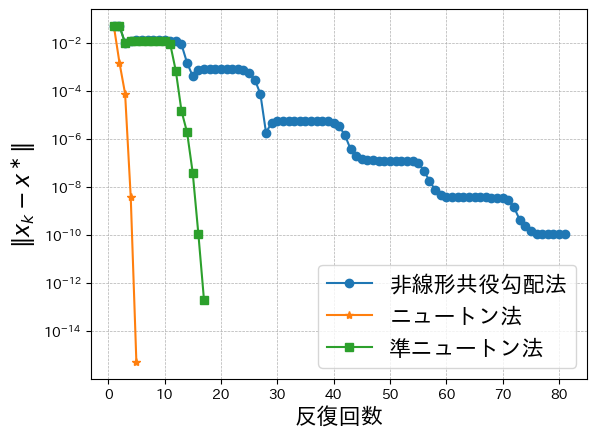

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib

# 各手法を拡張 Rosenbrock 関数に適用
dim = 10 # 10次元
x_0 = np.zeros(dim) # 初期点は 0 ベクトル
x_ast = np.ones(dim)
sequenceSD = SteepestDescent(func_Ex_rosen, grad_Ex_rosen, x_0, max_iter = 5000)
x_00 = sequenceSD[-1,:]
sequenceCG = CG_HS(func_Ex_rosen, grad_Ex_rosen, x_00, eps = 1.e-10)
sequenceN = Newton(func_Ex_rosen, grad_Ex_rosen, hess_Ex_rosen, x_00, eps = 1.e-10)
sequenceQN = QuasiNewton(func_Ex_rosen, grad_Ex_rosen, x_00, eps = 1.e-10)
# 各反復における誤差を計算
err_CG = np.linalg.norm(sequenceCG - x_ast, axis=1)
err_Newton = np.linalg.norm(sequenceN - x_ast, axis=1)
err_QuasiNewton = np.linalg.norm(sequenceQN - x_ast, axis=1)
# 縦軸を対数表記でプロット
ax_iter = np.arange(1, len(err_CG) + 1)
plt.semilogy(ax_iter, err_CG, marker='o', linestyle='-', label='非線形共役勾配法')
ax_iter = np.arange(1, len(err_Newton) + 1)
plt.semilogy(ax_iter, err_Newton, marker='*', linestyle='-', label='ニュートン法')
ax_iter = np.arange(1, len(err_QuasiNewton) + 1)
plt.semilogy(ax_iter, err_QuasiNewton, marker='s', linestyle='-', label='準ニュートン法')
# 軸ラベル
plt.xlabel(r'反復回数', fontsize=16)
plt.ylabel(r'$\|x_k-x^\ast\|$', fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(fontsize=16)
plt.show() # プロットを表示